In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import yfinance as yf

In [3]:
from sklearn.svm import SVR

In [4]:
ticker = "INFY.NS"
start_date = "2025-10-13"
end_date = "2025-10-14"

ohlc = yf.download(ticker, start=start_date, end=end_date, interval="1m")
ohlc.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_1364\2219107369.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ohlc = yf.download(ticker, start=start_date, end=end_date, interval="1m")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS
Datetime,,,,,
2025-10-13 03:45:00+00:00,1500.000000,1504.400024,1497.599976,1499.000000,0
2025-10-13 03:46:00+00:00,1496.000000,1499.500000,1495.800049,1499.400024,67808
2025-10-13 03:47:00+00:00,1499.699951,1501.900024,1494.500000,1496.099976,49580
2025-10-13 03:48:00+00:00,1499.900024,1500.800049,1498.000000,1498.699951,44136
2025-10-13 03:49:00+00:00,1501.900024,1501.900024,1499.000000,1499.000000,10756


In [5]:
ohlc.columns = ohlc.columns.droplevel(1)
ohlc.head()

Price,Close,High,Low,Open,Volume
Datetime,,,,,
2025-10-13 03:45:00+00:00,1500.000000,1504.400024,1497.599976,1499.000000,0
2025-10-13 03:46:00+00:00,1496.000000,1499.500000,1495.800049,1499.400024,67808
2025-10-13 03:47:00+00:00,1499.699951,1501.900024,1494.500000,1496.099976,49580
2025-10-13 03:48:00+00:00,1499.900024,1500.800049,1498.000000,1498.699951,44136
2025-10-13 03:49:00+00:00,1501.900024,1501.900024,1499.000000,1499.000000,10756


In [6]:
ohlc.value_counts()

Close        High         Low          Open         Volume
1484.099976  1484.300049  1483.400024  1484.199951  5459      1
1492.500000  1492.699951  1492.099976  1492.500000  4523      1
1492.900024  1494.500000  1491.800049  1491.900024  56484     1
1492.800049  1493.000000  1492.000000  1492.500000  36829     1
1492.699951  1492.900024  1492.400024  1492.900024  3489      1
                                                             ..
1488.099976  1488.699951  1488.000000  1488.400024  5775      1
             1488.300049  1486.199951  1487.099976  24497     1
             1488.199951  1487.800049  1488.000000  15644     1
1488.000000  1489.000000  1488.000000  1488.500000  6144      1
1504.400024  1504.400024  1501.500000  1501.500000  24536     1
Name: count, Length: 375, dtype: int64

In [7]:
ohlc=ohlc.reset_index()
ohlc.head()

Price,Datetime,Close,High,Low,Open,Volume
0,2025-10-13 03:45:00+00:00,1500.000000,1504.400024,1497.599976,1499.000000,0
1,2025-10-13 03:46:00+00:00,1496.000000,1499.500000,1495.800049,1499.400024,67808
2,2025-10-13 03:47:00+00:00,1499.699951,1501.900024,1494.500000,1496.099976,49580
3,2025-10-13 03:48:00+00:00,1499.900024,1500.800049,1498.000000,1498.699951,44136
4,2025-10-13 03:49:00+00:00,1501.900024,1501.900024,1499.000000,1499.000000,10756


In [8]:
ohlc.dtypes


Price
Datetime    datetime64[ns, UTC]
Close                   float64
High                    float64
Low                     float64
Open                    float64
Volume                    int64
dtype: object

In [9]:
times=[]
ohlc_close =[]

In [10]:
ohlc_times=ohlc.loc[:59,"Datetime"]
ohlc_prices=ohlc.loc[:59,"Close"]

In [11]:
ohlc_times=ohlc_times.dt.hour + ohlc_times.dt.minute / 60


In [12]:
ohlc_times.head()

0    3.750000
1    3.766667
2    3.783333
3    3.800000
4    3.816667
Name: Datetime, dtype: float64

In [13]:
#independentdata
for t in ohlc_times:
    times.append([t])    

In [14]:
#dependentdata
for p in ohlc_prices:
    ohlc_close.append(p)

In [15]:
len(times)

60

In [16]:
lin_svr =SVR(kernel="linear", C=1000.0)
lin_svr.fit(times,ohlc_close)

poly_svr =SVR(kernel="poly", C=1000.0, degree=2)
poly_svr.fit(times,ohlc_close)

rbf_svr =SVR(kernel="rbf", C=1000.0, gamma = 0.85)
rbf_svr.fit(times,ohlc_close)

SVR(C=1000.0, gamma=0.85)

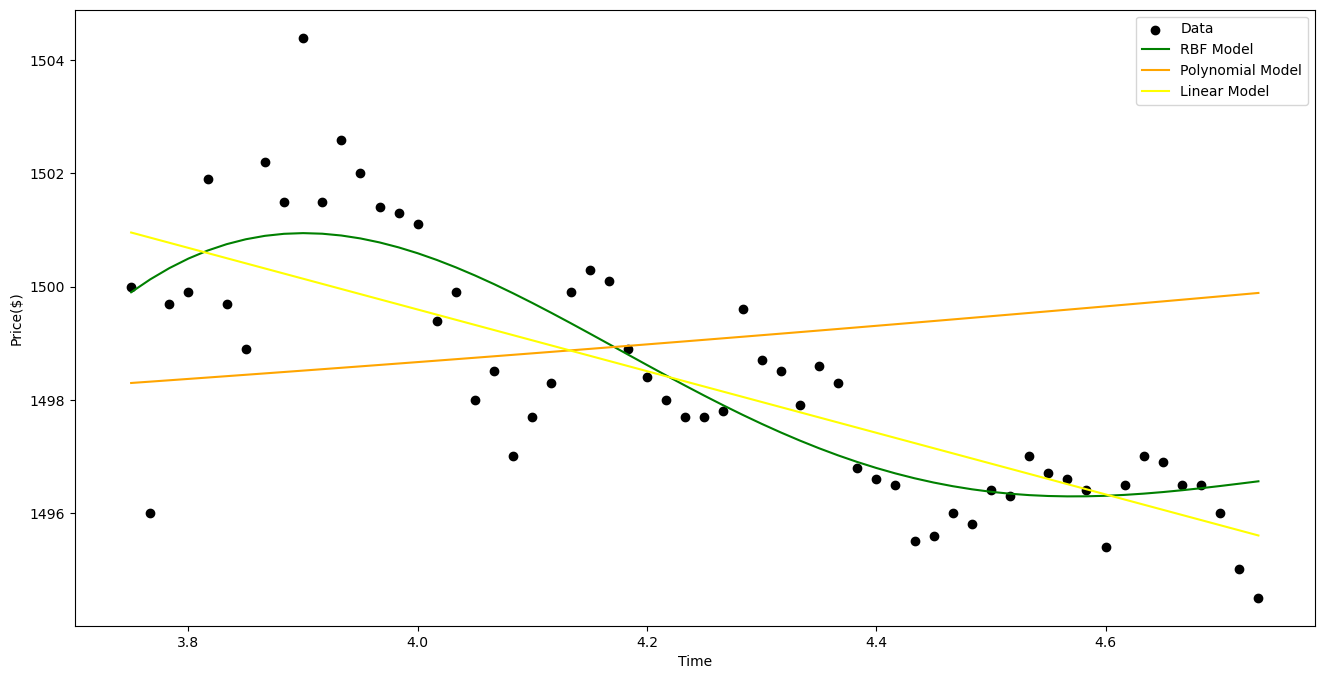

In [18]:
plt.figure(figsize=(16,8))
plt.scatter(times,ohlc_close,color="black",label="Data")
plt.plot(times,rbf_svr.predict(times),color = "green", label = "RBF Model")
plt.plot(times,poly_svr.predict(times),color = "orange", label = "Polynomial Model")
plt.plot(times,lin_svr.predict(times),color = "yellow", label = "Linear Model")
plt.xlabel("Time")
plt.ylabel("Price($)")
plt.legend()
plt.show()


In [19]:
ohlc.loc[60,"Datetime"]

Timestamp('2025-10-13 04:45:00+0000', tz='UTC')

In [20]:
ohlc_times.tail()

55    4.666667
56    4.683333
57    4.700000
58    4.716667
59    4.733333
Name: Datetime, dtype: float64

In [22]:
ohlc_time60=ohlc.loc[60,"Datetime"]
ohlc_price60=ohlc.loc[60,"Close"]

In [27]:

ohlc_time60_mod=ohlc_time60.hour + ohlc_time60.minute / 60
ohlc_time60_mod

4.75

In [28]:
ohlc_price60


1494.4000244140625

In [29]:
timepred=[[4.75]]
print("The RBF SVR predicted price: ",rbf_svr.predict(timepred))
print("The Linear SVR predicted price: ",lin_svr.predict(timepred))
print("The Polynomial SVR predicted price: ",poly_svr.predict(timepred))

The RBF SVR predicted price:  [1496.60046885]
The Linear SVR predicted price:  [1495.50961207]
The Polynomial SVR predicted price:  [1499.91816795]


In [37]:
ohlc.loc[370,"Close"]

1490.9000244140625

In [38]:
ohlc["Close"].iloc[-1]

1492.9000244140625

In [39]:
ohlc_last_time = ohlc["Datetime"].iloc[-1]

In [40]:
ohlc_last_time

Timestamp('2025-10-13 09:59:00+0000', tz='UTC')

In [41]:
ohlc_last_time_mod=ohlc_last_time.hour + ohlc_last_time.minute/60
ohlc_last_time_mod

9.983333333333333

In [43]:
last_time = [[ohlc_last_time_mod]]

In [44]:
print("The RBF SVR predicted price: ",rbf_svr.predict(last_time))
print("The Linear SVR predicted price: ",lin_svr.predict(last_time))
print("The Polynomial SVR predicted price: ",poly_svr.predict(last_time))

The RBF SVR predicted price:  [1481.89006369]
The Linear SVR predicted price:  [1467.00413563]
The Polynomial SVR predicted price:  [1514.63087119]
